In [20]:
#!/usr/bin/env python3
# initialization
import importlib
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import transpile

# import basic plot tools
import matplotlib.pyplot as plt
import utilitiesRepetitionCode as utl
import utilities as commonUtl
importlib.reload(utl)

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True # For latex plots
mpl.rcParams.update({'font.size': 12})
mpl.rcParams.update({'font.family': "Times"})

basis1 = ["h", "s", "sdg", "cx", "t", "cxx"]
basis2 = ["cx", "id", "rz", "sx", "x"]


In [21]:
# gate_reps=[2, 4, 6]
SHOTS=10000
gate_rep=6
# for gate_rep in gate_reps:
encoding_rep=2
circ = transpile(utl.testcirc_h(gate_rep), basis_gates=basis1, optimization_level=0)
print(circ)
coded_circ = utl.Encodings.to_encoded_circ_CliffT(circ, encoding_rep)
print(coded_circ)
correct_answer = commonUtl.to_percentages(commonUtl.keys_to_binary(
    commonUtl.execute_circ_with_depol(circ, 0)))
err_vals = np.linspace(1e-5, 1e-2, 10)
uncoded_sso = []
coded_sso = []
for prob1 in err_vals:
    result_circ = commonUtl.keys_to_binary(commonUtl.to_percentages(commonUtl.execute_circ_with_depol(circ, prob1)))
    result_coded_circ = commonUtl.keys_to_binary(commonUtl.to_percentages(utl.post_select(
                        commonUtl.execute_circ_with_depol(coded_circ, prob1, SHOTS), encoding_rep, logical_bases={"0"*encoding_rep: "0", "1"*encoding_rep: "1"})))

    uncoded_sso.append(commonUtl.get_sso(result_circ, correct_answer))
    coded_sso.append(commonUtl.get_sso(result_coded_circ, correct_answer))
    print(result_circ)
    print(result_coded_circ)


        ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├─░─┤M├
        └───┘└───┘└───┘└───┘└───┘└───┘ ░ └╥┘
meas: 1/══════════════════════════════════╩═
                                          0 
            ┌───┐          ┌───┐          ┌───┐          ┌───┐          ┌───┐»
q38_0: ──■──┤ H ├──■────■──┤ H ├──■────■──┤ H ├──■────■──┤ H ├──■────■──┤ H ├»
       ┌─┴─┐└───┘┌─┴─┐┌─┴─┐└───┘┌─┴─┐┌─┴─┐└───┘┌─┴─┐┌─┴─┐└───┘┌─┴─┐┌─┴─┐└───┘»
q38_1: ┤ X ├─────┤ X ├┤ X ├─────┤ X ├┤ X ├─────┤ X ├┤ X ├─────┤ X ├┤ X ├─────»
       └───┘     └───┘└───┘     └───┘└───┘     └───┘└───┘     └───┘└───┘     »
 c8: 2/══════════════════════════════════════════════════════════════════════»
                                                                             »
«                 ┌───┐      ░ ┌─┐   
«q38_0: ──■────■──┤ H ├──■───░─┤M├───
«       ┌─┴─┐┌─┴─┐└───┘┌─┴─┐ ░ └╥┘┌─┐
«q38_1: ┤ X ├┤ X ├─────┤ X ├─░──╫─┤M├
«       └───┘└───┘     └───┘ ░  ║ └╥┘
« c8: 2/════════════════════════

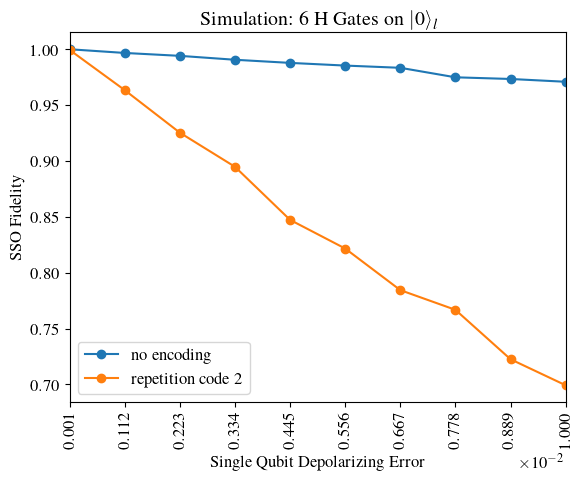

not encoded ssso: [1.0, 0.9967, 0.9941, 0.9906, 0.9878, 0.9854, 0.9834, 0.9749000000000001, 0.9734, 0.9709000000000001]
encoded ssso: [0.9993998199459838, 0.9634055265123226, 0.9253173164097913, 0.8947937958398461, 0.8472648261758692, 0.8216180371352785, 0.7843788948899044, 0.7667490190379306, 0.7225122850122849, 0.6992163009404387]


In [32]:
fig, ax = plt.subplots()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=False)
plt.xlim([err_vals[0], err_vals[-1]])
plt.xticks(err_vals, rotation=90)
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.2e'))
plt.plot(err_vals, uncoded_sso, label="no encoding", marker="o")
plt.plot(err_vals, coded_sso, label=f"repetition code {encoding_rep}", marker="o")
plt.ylabel('SSO Fidelity')
plt.xlabel("Single Qubit Depolarizing Error")
plt.title(f"Simulation: {gate_rep} H Gates on " + r"$|0\rangle_l$")
plt.legend()
plt.show()
print(f"not encoded ssso: {uncoded_sso}")
print(f"encoded ssso: {coded_sso}")